In [2]:
import pandas as pd
import seaborn as sns

In [3]:
train = pd.read_csv("train2.csv") # loading the train1 dataset from step_2

In [4]:
train.head()

,order_no,user_id,vehicle_type,platform_type,customer_type,placed_day,placed_wkday,placed_time,confirmed_day,confirmed_wkday,...,pickup_lat,pickup_long,delivered_lat,delivered_long,Rider Id,time_pickup_to_arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,1900-01-01 09:35:46,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,1900-01-01 11:16:16,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,1900-01-01 12:39:25,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,1900-01-01 09:25:34,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,1900-01-01 09:55:18,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


In [5]:
train.columns

Index(['order_no', 'user_id', 'vehicle_type', 'platform_type', 'customer_type',
       'placed_day', 'placed_wkday', 'placed_time', 'confirmed_day',
       'confirmed_wkday', 'confirmed_time', 'arrive_pickup_day',
       'arrive_pickup_wkday', 'arrive_pickup_time', 'pickup_day',
       'pickup_wkday', 'pickup_time', 'delivered_day', 'delivered_wkday',
       'delivered_time', 'distance_km', 'temp', 'pickup_lat', 'pickup_long',
       'delivered_lat', 'delivered_long', 'Rider Id', 'time_pickup_to_arrival',
       'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings'],
      dtype='object')

In [6]:
train['confirmed_wkday'].value_counts() #seeing how many orders are placed within each weekday 

4    4229
5    3993
2    3959
3    3823
1    3788
6    1223
7     186
Name: confirmed_wkday, dtype: int64

From here there are:
- 3788 orders on Monday 
- 3959 orders on Tuesday 
- 3823 orders on Wednesday 
- 4229 orders on Thursday 
- 3993 orders on Friday 
- 1223 orders on Saturday 
- 186 orders on Sunday

In [19]:
train['placed_day'].value_counts() #seeing how many orders are placed within each day

8     848
7     822
13    811
14    804
6     794
28    784
4     769
18    769
15    762
11    752
5     747
3     718
30    714
10    709
25    691
29    685
27    670
9     667
12    666
22    650
21    649
20    643
26    639
2     602
17    593
24    591
19    589
16    565
23    563
1     482
31    453
Name: placed_day, dtype: int64

# Categorical Variables 

In [31]:
pd.crosstab(train.vehicle_type, train.customer_type) #Let's begin by taking a look at the relationship two categorical variables. The easist way to do this is with a cross tabulation:

customer_type,Business,Personal
vehicle_type,,
Bike,17384,3817


In [43]:
df = pd.read_csv("train2.csv")

In [45]:
df

,order_no,user_id,vehicle_type,platform_type,customer_type,placed_day,placed_wkday,placed_time,confirmed_day,confirmed_wkday,...,pickup_lat,pickup_long,delivered_lat,delivered_long,Rider Id,time_pickup_to_arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,1900-01-01 09:35:46,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,1900-01-01 11:16:16,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,1900-01-01 12:39:25,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,1900-01-01 09:25:34,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,1900-01-01 09:55:18,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,1900-01-01 15:54:38,20,3,...,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9,1270,367,14.4,131
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,1900-01-01 10:13:34,13,6,...,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770,1023,242,12.5,114
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,1900-01-01 17:06:16,7,4,...,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953,314,473,13.8,29
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,1900-01-01 09:31:39,4,3,...,-1.250030,36.874167,-1.279210,36.794872,Rider_Id_347,1380,2451,1821,14.0,1101


In [48]:
df.groupby('delivered_wkday').Age.median() #We can also look at how a numerical variable is related to a categorical variable by, for example, examining the mean/median of the numerical variable for each category:

delivered_wkday
1    872.0
2    872.0
3    874.0
4    872.0
5    846.0
6    824.0
7    900.0
Name: Age, dtype: float64

# Numerical Variables 

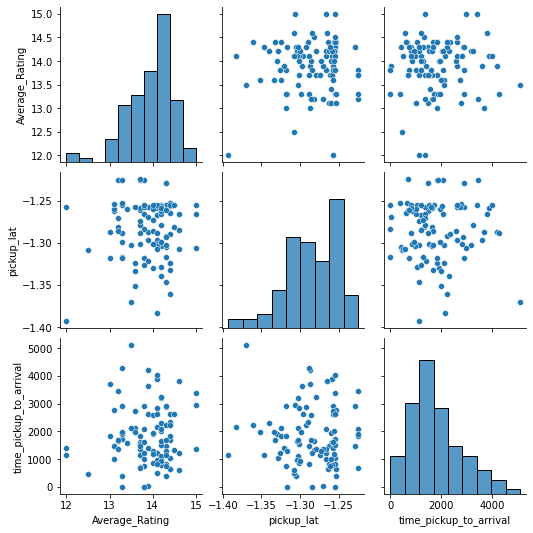

In [54]:
sns.pairplot(df[['Average_Rating', 'pickup_lat', 'time_pickup_to_arrival']].head(100)) #using only 3 variables and only 100 observations to save time 

<AxesSubplot:xlabel='Age', ylabel='delivered_wkday'>

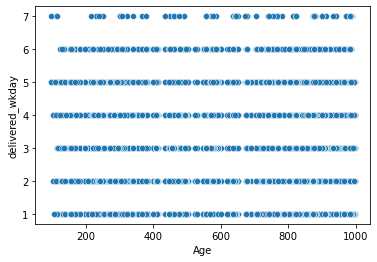

In [57]:
sns.scatterplot(x="Age", y="delivered_wkday", data=df[df.Age < 1000])

In [61]:
Age = pd.read_csv("train2.csv")

In [62]:
Age

,order_no,user_id,vehicle_type,platform_type,customer_type,placed_day,placed_wkday,placed_time,confirmed_day,confirmed_wkday,...,pickup_lat,pickup_long,delivered_lat,delivered_long,Rider Id,time_pickup_to_arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,1900-01-01 09:35:46,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,1900-01-01 11:16:16,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,1900-01-01 12:39:25,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,1900-01-01 09:25:34,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,1900-01-01 09:55:18,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,1900-01-01 15:54:38,20,3,...,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9,1270,367,14.4,131
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,1900-01-01 10:13:34,13,6,...,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770,1023,242,12.5,114
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,1900-01-01 17:06:16,7,4,...,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953,314,473,13.8,29
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,1900-01-01 09:31:39,4,3,...,-1.250030,36.874167,-1.279210,36.794872,Rider_Id_347,1380,2451,1821,14.0,1101


In [64]:
correlations = Age[Age_cols].corr()
correlations

NameError: name 'Age_cols' is not defined